In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/PROJECTGREEN/PROJECT BLUE/Data_Train.csv")
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.isna().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [27]:
df.dropna(inplace=True)

In [9]:
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month
df.drop(['Date_of_Journey'], axis=1, inplace=True)

In [10]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
df.drop(['Dep_Time'], axis=1, inplace=True)

<ipython-input-10-ba9ad65c3392>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
<ipython-input-10-ba9ad65c3392>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
<ipython-input-10-ba9ad65c3392>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
<ipython-input-10-ba9ad65c3392>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsi

In [ ]:
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop(['Arrival_Time'], axis=1, inplace=True)

In [11]:
# Add '0h' or '0m' if missing
df['Duration'] = df['Duration'].apply(lambda x: x if 'h' in x and 'm' in x else x+' 0m' if 'h' in x else '0h '+x)

In [ ]:
# Extract hours and minutes
df['Duration_hours'] = df['Duration'].apply(lambda x: int(x.split('h')[0]))
df['Duration_mins'] = df['Duration'].apply(lambda x: int(x.split('h')[1].split('m')[0]))
df.drop(['Duration'], axis=1, inplace=True)

In [12]:
# Total_Stops as ordinal
df['Total_Stops'] = df['Total_Stops'].map({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
})

In [ ]:
# Route is redundant since Total_Stops already encoded the info
df.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [ ]:
# One-hot encode other categorical features
df = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination'], drop_first=True)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

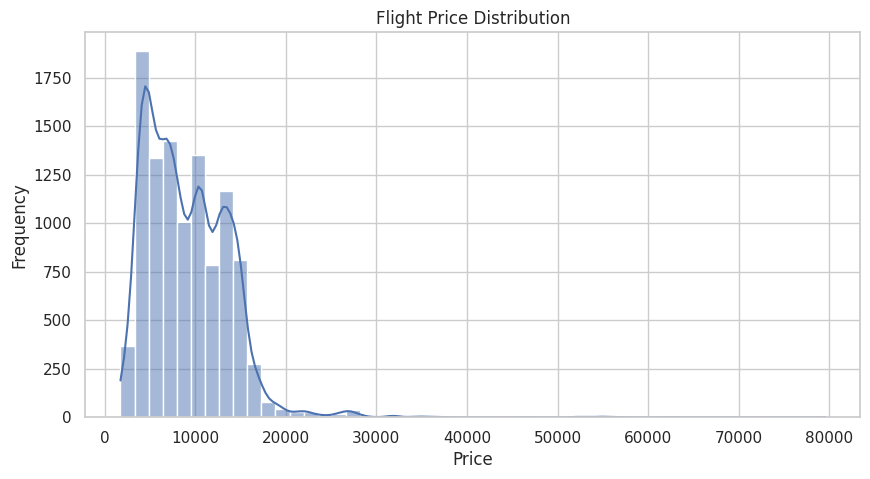

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df['Price'], kde=True, bins=50)
plt.title('Flight Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

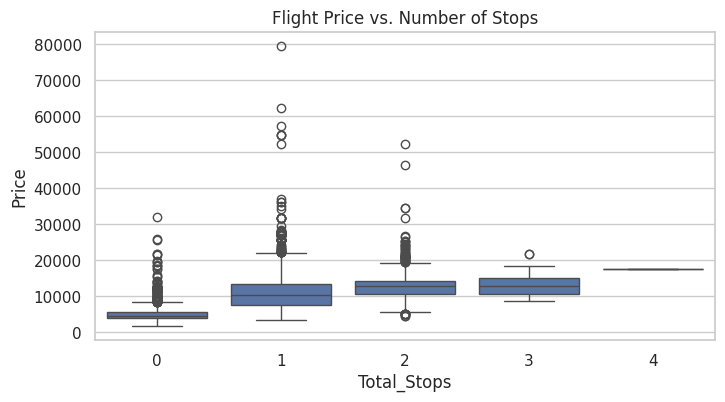

In [15]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title('Flight Price vs. Number of Stops')
plt.show()


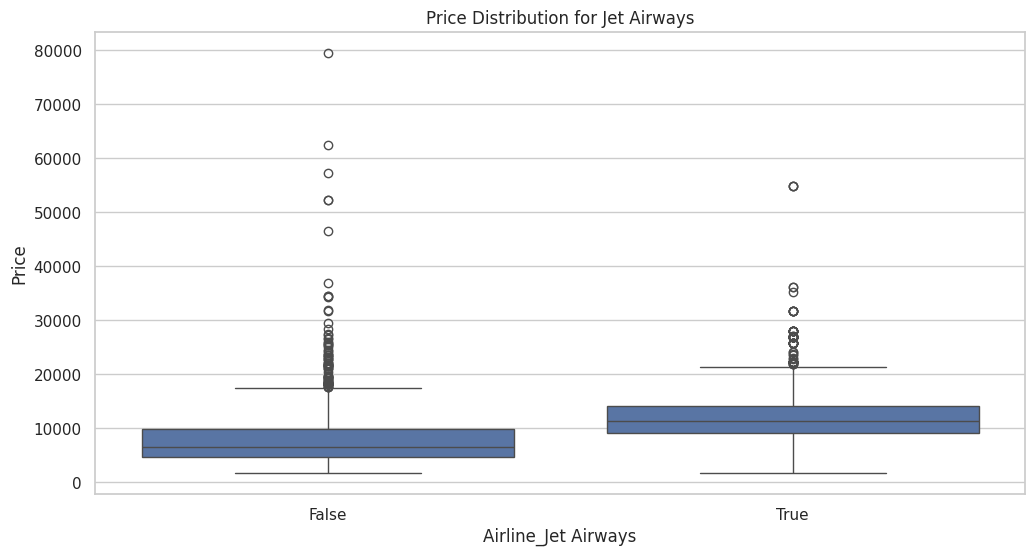

Airline_Air India: Mean Price = 9612.43
Airline_GoAir: Mean Price = 5861.06
Airline_IndiGo: Mean Price = 5673.68
Airline_Jet Airways: Mean Price = 11643.92
Airline_Jet Airways Business: Mean Price = 58358.67
Airline_Multiple carriers: Mean Price = 10902.68
Airline_Multiple carriers Premium economy: Mean Price = 11418.85
Airline_SpiceJet: Mean Price = 4338.28
Airline_Trujet: Mean Price = 4140.00
Airline_Vistara: Mean Price = 7796.35
Airline_Vistara Premium economy: Mean Price = 8962.33


In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Airline_Jet Airways', y='Price', data=df)
plt.title('Price Distribution for Jet Airways')
plt.show()

# OR loop through all airlines:
airlines = [col for col in df.columns if 'Airline_' in col]
for airline in airlines:
    print(f"{airline}: Mean Price = {df[df[airline]==1]['Price'].mean():.2f}")


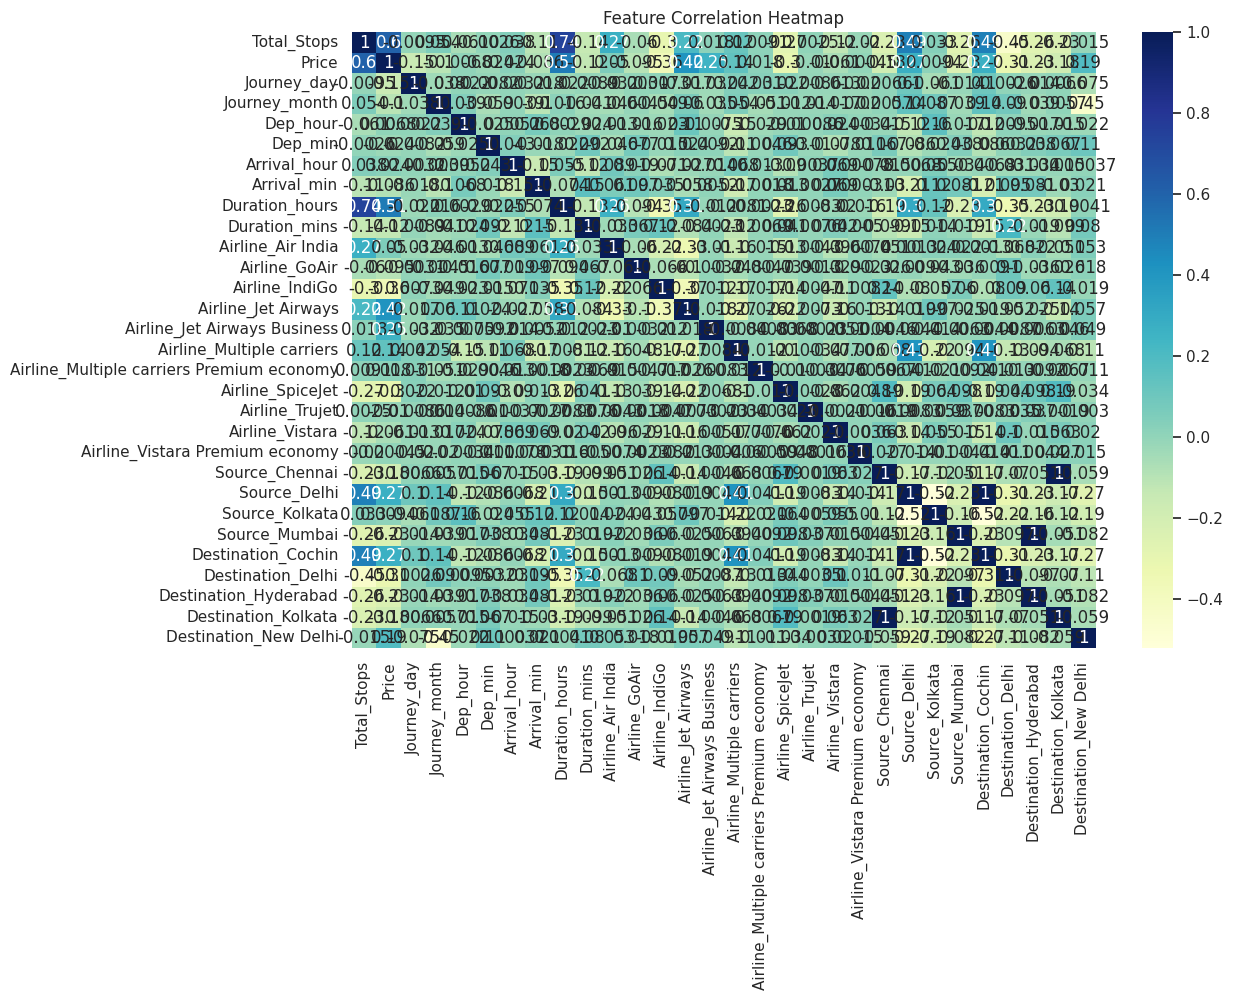

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")
plt.show()


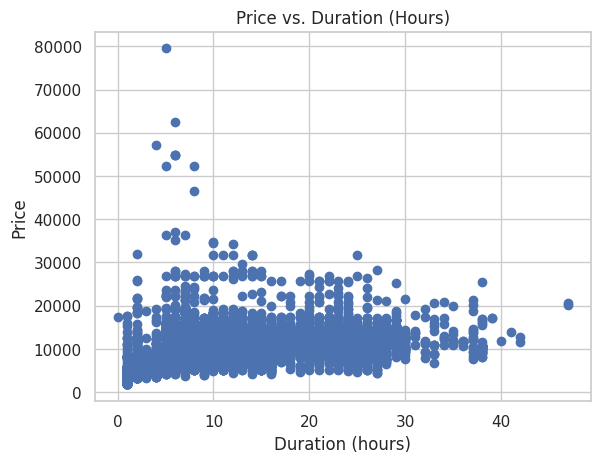

In [18]:
plt.scatter(df['Duration_hours'], df['Price'])
plt.title('Price vs. Duration (Hours)')
plt.xlabel('Duration (hours)')
plt.ylabel('Price')
plt.show()


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression
MAE: 1972.9372855148047
RMSE: 2863.9705929717807
R2 Score: 0.61959437290701


In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest
MAE: 1176.1679126309011
RMSE: 2089.372802628276
R2 Score: 0.7975388505283276


In [22]:
!pip install xgboost

from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2 Score:", r2_score(y_test, y_pred_xgb))


XGBoost
MAE: 1126.7001953125
RMSE: 1822.4563094900245
R2 Score: 0.8459633588790894


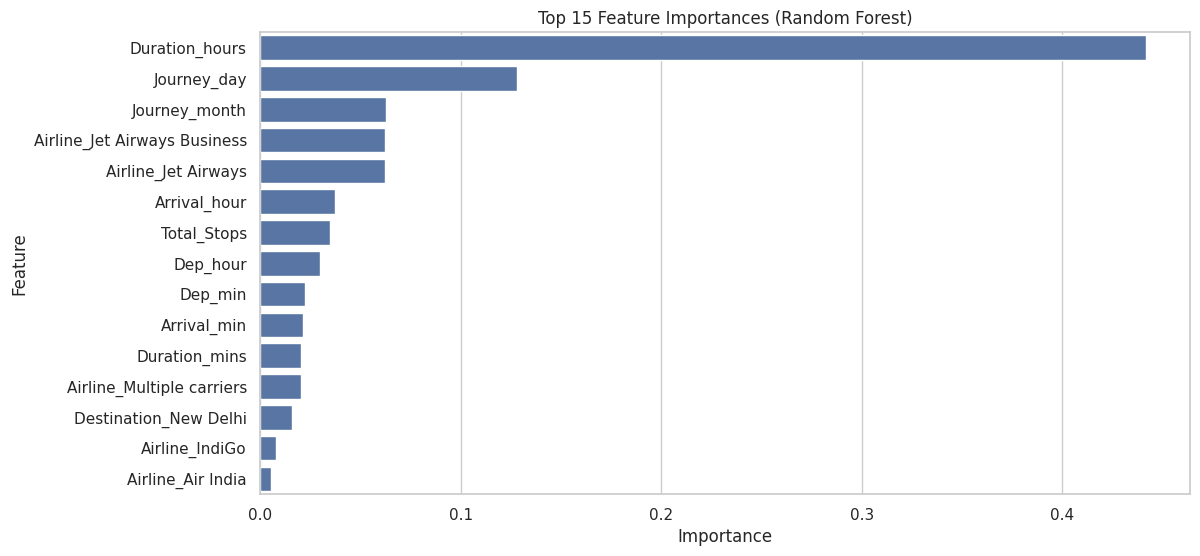

In [23]:
importances = rf.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(15))
plt.title('Top 15 Feature Importances (Random Forest)')
plt.show()


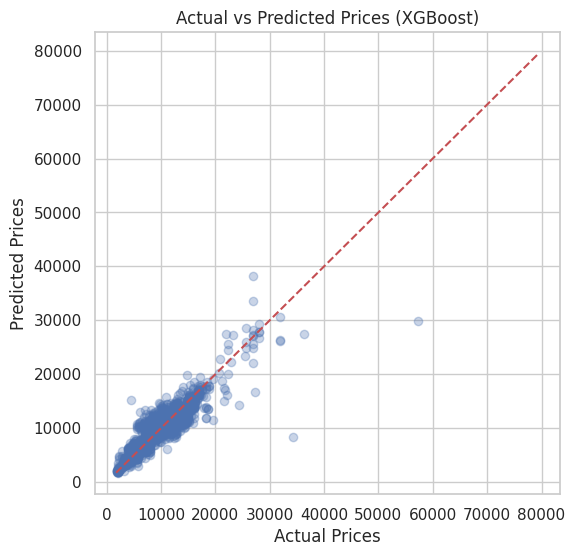

In [24]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (XGBoost)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.show()


In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)
print("CV RMSE:", rmse_scores.mean())


CV RMSE: 1800.9832873134972
